<a href="https://colab.research.google.com/github/luthfiamrr/notebook-collections/blob/main/predict_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/bogor_weather_jan_jun_2024.csv'

df_jan_jun = pd.read_csv(file_path)

df_jan_jun

,Bulan,Suhu Rata-rata (°C),Kelembaban Rata-rata (%)
0,Januari,28.8,89
1,Februari,29.0,90
2,Maret,29.6,86
3,April,29.9,86
4,Mei,30.3,85
5,Juni,30.0,83


In [ ]:
import numpy as np

bulan = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)

In [ ]:
suhu = df_jan_jun['Suhu Rata-rata (°C)'].values
kelembaban = df_jan_jun['Kelembaban Rata-rata (%)'].values

from sklearn.model_selection import train_test_split

bulan_latih, bulan_uji, suhu_latih, suhu_uji = train_test_split(bulan, suhu, test_size=0.2, random_state=42)
bulan_latih, bulan_uji, kelembaban_latih, kelembaban_uji = train_test_split(bulan, kelembaban, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

suhu_model = LinearRegression()
suhu_model.fit(bulan_latih, suhu_latih)

suhu_terprediksi = suhu_model.predict(bulan_uji)

In [ ]:
kelembaban_model = LinearRegression()
kelembaban_model.fit(bulan_latih, kelembaban_latih)

kelembaban_terprediksi = kelembaban_model.predict(bulan_uji)

In [ ]:
from sklearn.metrics import mean_squared_error

mse_suhu = mean_squared_error(suhu_uji, suhu_terprediksi)
print(f"Mean Squared Error untuk Prediksi Suhu: {mse_suhu}")

mse_kelembaban = mean_squared_error(kelembaban_uji, kelembaban_terprediksi)
print(f"Mean Squared Error untuk Prediksi Kelembaban: {mse_kelembaban}")

Mean Squared Error untuk Prediksi Suhu: 0.32530000000000436
Mean Squared Error untuk Prediksi Kelembaban: 3.25


In [ ]:
bulan_mendatang = np.array([7, 8, 9, 10, 11, 12]).reshape(-1, 1)

prediksi_suhu = suhu_model.predict(bulan_mendatang)

prediksi_kelembaban = kelembaban_model.predict(bulan_mendatang)

In [ ]:
data_prediksi = {
    'Bulan': ['Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'],
    'Suhu Rata-rata (°C)': prediksi_suhu,
    'Kelembaban Rata-rata (%)': prediksi_kelembaban
}

data_prediksi

{'Bulan': ['Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'],
 'Suhu Rata-rata (°C)': array([30.35, 30.51, 30.67, 30.83, 30.99, 31.15]),
 'Kelembaban Rata-rata (%)': array([82.5, 81.5, 80.5, 79.5, 78.5, 77.5])}

In [ ]:
df_jul_des = pd.DataFrame(data_prediksi)

df_jan_des = pd.concat([df_jan_jun, df_jul_des], ignore_index=True)

output_file_path = 'bogor_weather_jan_des_2024.csv'
df_jan_des.to_csv(output_file_path, index=False)

print(f"File telah berhasil disimpan ke {output_file_path}")

File telah berhasil disimpan ke bogor_weather_jan_des_2024.csv


In [ ]:
df_jan_des

,Bulan,Suhu Rata-rata (°C),Kelembaban Rata-rata (%)
0,Januari,28.80,89.0
1,Februari,29.00,90.0
2,Maret,29.60,86.0
3,April,29.90,86.0
4,Mei,30.30,85.0
5,Juni,30.00,83.0
6,Juli,30.35,82.5
7,Agustus,30.51,81.5
8,September,30.67,80.5
9,Oktober,30.83,79.5


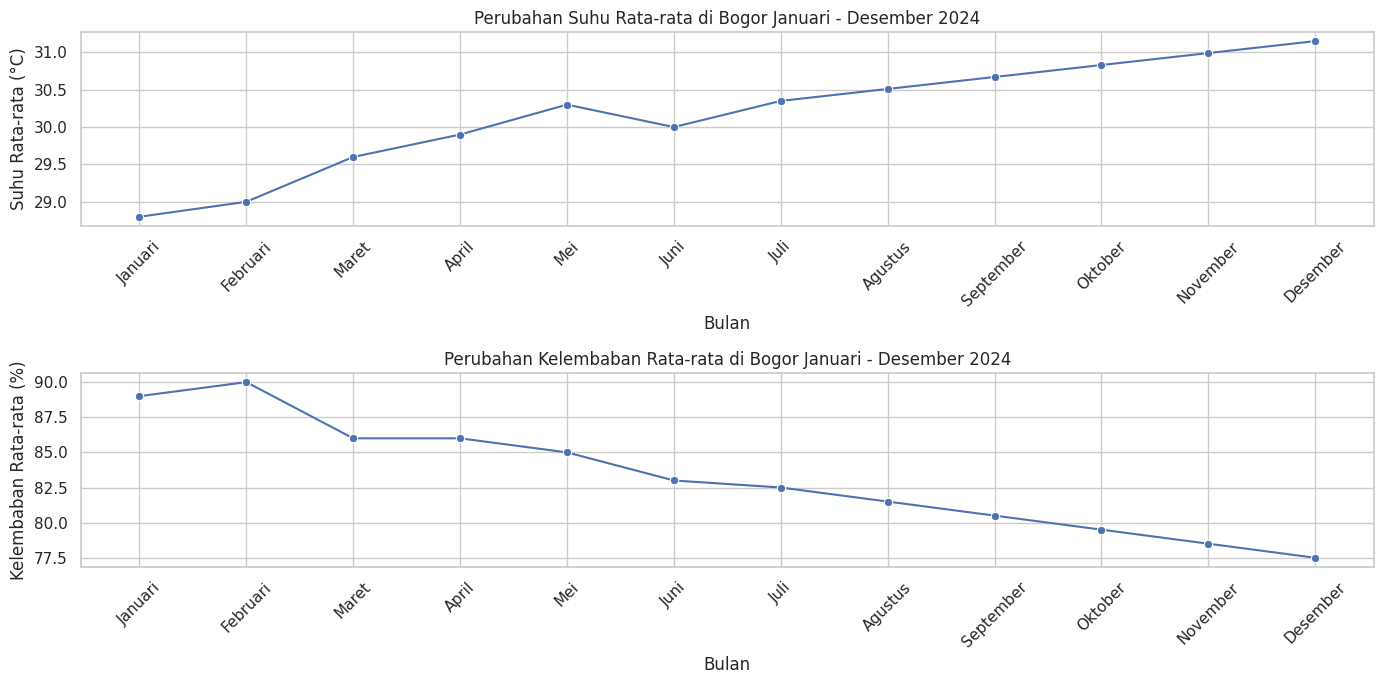

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

plt.subplot(2, 1, 1)
sns.lineplot(data=df_jan_des, x='Bulan', y='Suhu Rata-rata (°C)', marker='o')
plt.title('Perubahan Suhu Rata-rata di Bogor Januari - Desember 2024')
plt.xlabel('Bulan')
plt.ylabel('Suhu Rata-rata (°C)')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
sns.lineplot(data=df_jan_des, x='Bulan', y='Kelembaban Rata-rata (%)', marker='o')
plt.title('Perubahan Kelembaban Rata-rata di Bogor Januari - Desember 2024')
plt.xlabel('Bulan')
plt.ylabel('Kelembaban Rata-rata (%)')
plt.xticks(rotation=45)

plt.tight_layout()

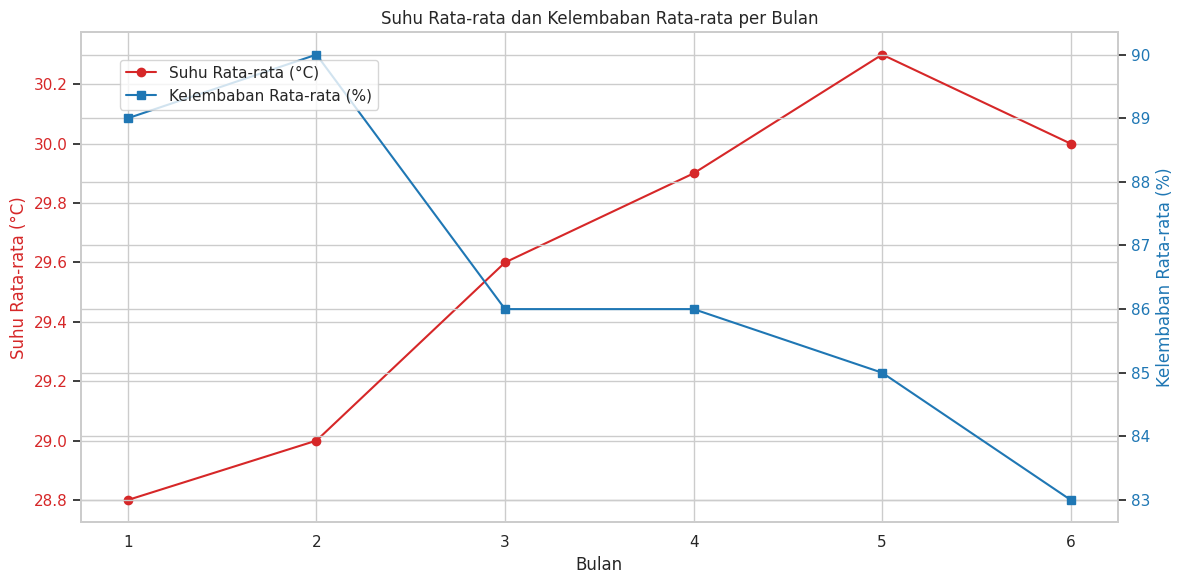

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Bulan')
ax1.set_ylabel('Suhu Rata-rata (°C)', color=color)
ax1.plot(bulan, suhu, color=color, marker='o', label='Suhu Rata-rata (°C)')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Kelembaban Rata-rata (%)', color=color)
ax2.plot(bulan, kelembaban, color=color, marker='s', label='Kelembaban Rata-rata (%)')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Suhu Rata-rata dan Kelembaban Rata-rata per Bulan')

fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()

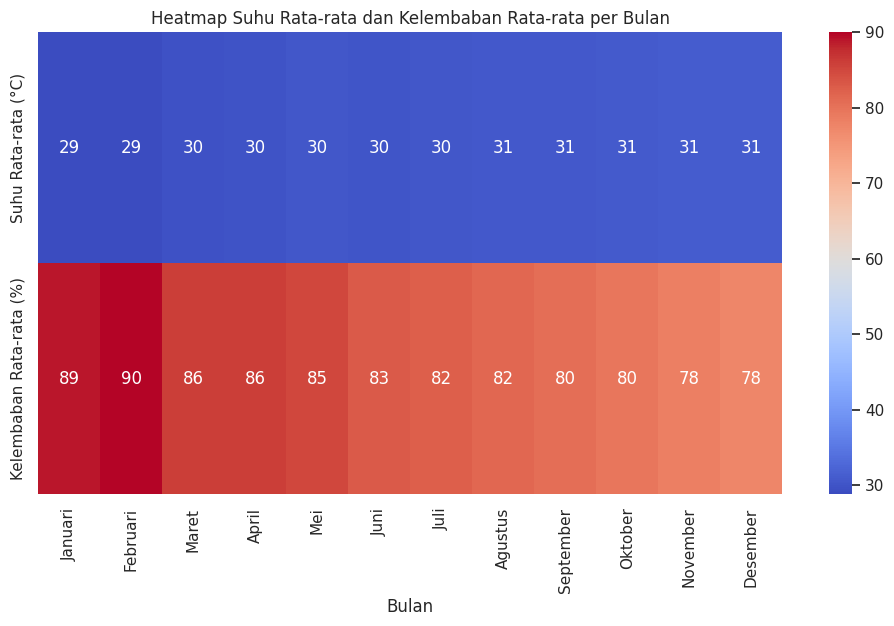

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_jan_des.set_index('Bulan').T, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap Suhu Rata-rata dan Kelembaban Rata-rata per Bulan')
plt.show()